In [2]:
from scipy.stats import zscore
import matplotlib.pyplot as plt
from data_import import df_merged
import pandas as pd
import numpy as np
df_merged

1999-03-10 00:00:00
           Date      Volume  % Change  TMAX  TMIN  TOTALPRCP binned
0    1999-03-10  11700414.0 -0.124666    42    27       0.00    Low
1    1999-03-11  21670048.0 -0.247858    40    26       0.00    Low
2    1999-03-12  19553768.0 -2.080007    39    24       0.00    Low
3    1999-03-15  14245348.0  2.108601    41    32       4.37   High
4    1999-03-16  10971066.0  0.419432    50    32       0.00    Low
...         ...         ...       ...   ...   ...        ...    ...
4696 2017-11-06   9714451.5  0.195827    66    46       0.01    Low
4697 2017-11-07  10337675.5 -0.068213    49    40       0.70    Low
4698 2017-11-08   9011700.7  0.188292    49    39       0.00    Low
4699 2017-11-09  16871876.3  0.149131    55    39       0.00    Low
4700 2017-11-10   9777757.4  0.053403    51    25       0.01    Low

[4701 rows x 7 columns]


,Date,Volume,% Change,TMAX,TMIN,TOTALPRCP,binned
0,2005-02-25,70221808,0.973561,36,22,2.13,Med
1,2005-02-28,79695344,-0.445287,35,30,5.20,High
2,2005-03-01,54607412,0.380156,42,30,3.19,Med
3,2005-03-02,73733090,0.342173,39,28,0.00,Low
4,2005-03-03,71286823,-0.358524,33,23,0.00,Low
...,...,...,...,...,...,...,...
3196,2017-11-06,49529148,0.212931,66,46,0.01,Low
3197,2017-11-07,57218448,-0.115844,49,40,0.70,Low
3198,2017-11-08,50277699,0.247611,49,39,0.00,Low
3199,2017-11-09,94537282,0.170721,55,39,0.00,Low


Merged Data Z-Score:

In [3]:
# df_stocks.apply(zscore)

cols = list(df_merged.select_dtypes(include=np.number).columns)

for col in cols:
    col_zscore = col + ' Zscore'
    df_merged[col_zscore] = (df_merged[col] - df_merged[col].mean())/df_merged[col].std(ddof=0)
 
df_merged


,Date,Volume,% Change,TMAX,TMIN,TOTALPRCP,binned,Volume Zscore,% Change Zscore,TMAX Zscore,TMIN Zscore,TOTALPRCP Zscore
0,2005-02-25,70221808,0.973561,36,22,2.13,Med,-0.828570,1.018158,-1.550376,-1.673847,2.138601
1,2005-02-28,79695344,-0.445287,35,30,5.20,High,-0.748335,-0.484756,-1.605841,-1.188572,5.601475
2,2005-03-01,54607412,0.380156,42,30,3.19,Med,-0.960814,0.389594,-1.217588,-1.188572,3.334251
3,2005-03-02,73733090,0.342173,39,28,0.00,Low,-0.798832,0.349360,-1.383982,-1.309891,-0.263979
4,2005-03-03,71286823,-0.358524,33,23,0.00,Low,-0.819550,-0.392853,-1.716770,-1.613188,-0.263979
...,...,...,...,...,...,...,...,...,...,...,...,...
3196,2017-11-06,49529148,0.212931,66,46,0.01,Low,-1.003823,0.212460,0.113563,-0.218021,-0.252700
3197,2017-11-07,57218448,-0.115844,49,40,0.70,Low,-0.938700,-0.135794,-0.829336,-0.581978,0.525601
3198,2017-11-08,50277699,0.247611,49,39,0.00,Low,-0.997483,0.249195,-0.829336,-0.642637,-0.263979
3199,2017-11-09,94537282,0.170721,55,39,0.00,Low,-0.622634,0.167750,-0.496548,-0.642637,-0.263979


Weather Z-Scores

In [4]:
# cols = list(df_weather.columns)

# for col in cols:
#     col_zscore = col + ' Zscore'
#     df_weather[col_zscore] = (df_weather[col] - df_weather[col].mean())/df_weather[col].std(ddof=0)
    
# df_weather

Vizualization - Z Scores

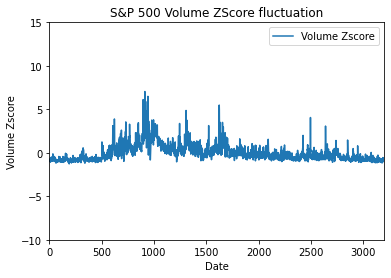

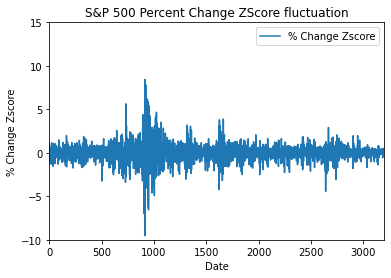

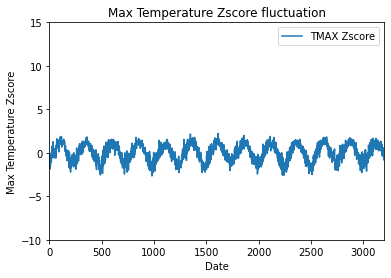

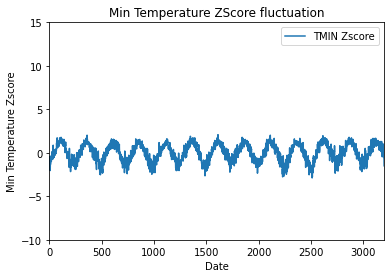

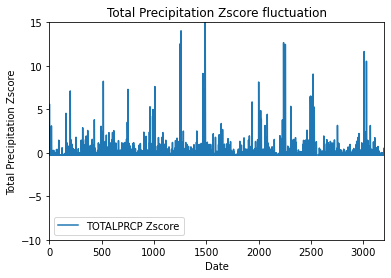

In [5]:
df_merged.plot(y = "Volume Zscore")
plt.xlabel("Date")
plt.ylabel("Volume Zscore")
plt.title("S&P 500 Volume ZScore fluctuation")
plt.axis([df_merged.index.min(), df_merged.index.max(), -10, 15])
plt.show()

df_merged.plot(y = "% Change Zscore")
plt.xlabel("Date")
plt.ylabel("% Change Zscore")
plt.title("S&P 500 Percent Change ZScore fluctuation")
plt.axis([df_merged.index.min(), df_merged.index.max(), -10, 15])
plt.show()

df_merged.plot(y = "TMAX Zscore")
plt.xlabel("Date")
plt.ylabel("Max Temperature Zscore")
plt.title("Max Temperature Zscore fluctuation")
plt.axis([df_merged.index.min(), df_merged.index.max(), -10, 15])
plt.show()

df_merged.plot(y = "TMIN Zscore")
plt.xlabel("Date")
plt.ylabel("Min Temperature Zscore")
plt.title("Min Temperature ZScore fluctuation")
plt.axis([df_merged.index.min(), df_merged.index.max(), -10, 15])
plt.show()

df_merged.plot(y = "TOTALPRCP Zscore")
plt.xlabel("Date")
plt.ylabel("Total Precipitation Zscore")
plt.title("Total Precipitation Zscore fluctuation")
plt.axis([df_merged.index.min(), df_merged.index.max(), -10, 15])
plt.show()



FIRST METHOD OF LINEAR REGRESSION:

In [6]:
stock_percent_np = np.array(df_merged['% Change'])
weather_precip_np = np.array(df_merged['TOTALPRCP'])

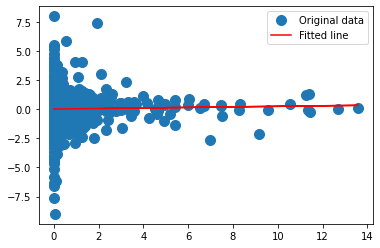

In [7]:
A = np.vstack([weather_precip_np, np.ones(len(weather_precip_np))]).T
m, c = np.linalg.lstsq(A, stock_percent_np, rcond=None)[0]
plt.plot(weather_precip_np, stock_percent_np, 'o', label='Original data', markersize=10)
plt.plot(weather_precip_np, m*weather_precip_np + c, 'r', label='Fitted line')
plt.legend()
plt.show()

SECOND METHOD OF LINEAR REGRESSION

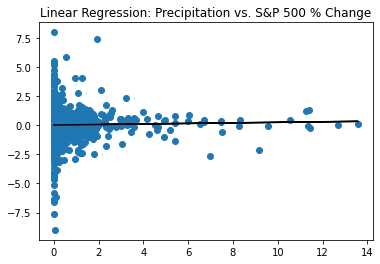

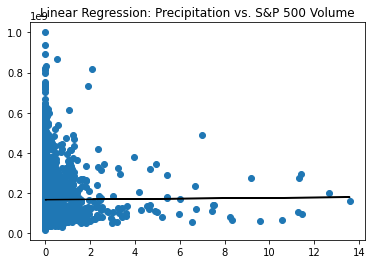

In [8]:
stock_volume = stock_percent = df_merged['Volume'].values.reshape(-1,1)
stock_percent = df_merged['% Change'].values.reshape(-1,1)
weather_precip = df_merged['TOTALPRCP'].values.reshape(-1,1)
weather_max = df_merged['TMAX'].values.reshape(-1,1)
weather_min = df_merged['TMIN'].values.reshape(-1,1)

from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()  
linear_regressor.fit(weather_precip, stock_percent)  
Y_pred = linear_regressor.predict(weather_precip)
plt.scatter(weather_precip, stock_percent)
plt.plot(weather_precip, Y_pred, color='black')
plt.title("Linear Regression: Precipitation vs. S&P 500 % Change")
plt.show()

from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()  
linear_regressor.fit(weather_precip, stock_volume)  
Y_pred = linear_regressor.predict(weather_precip)
plt.scatter(weather_precip, stock_volume)
plt.plot(weather_precip, Y_pred, color='black')
plt.title("Linear Regression: Precipitation vs. S&P 500 Volume")
plt.show()

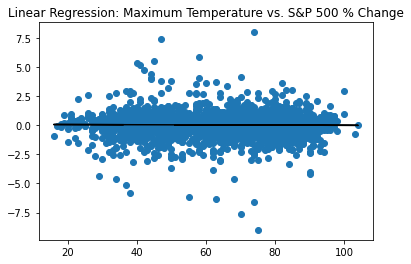

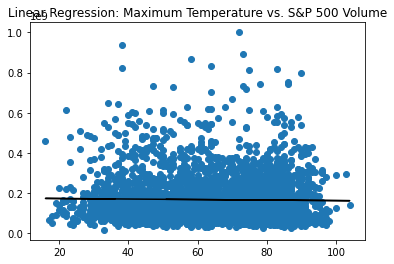

In [9]:
linear_regressor.fit(weather_max, stock_percent)  
Y_pred = linear_regressor.predict(weather_max) 
plt.scatter(weather_max, stock_percent)
plt.plot(weather_max, Y_pred, color='black')
plt.title("Linear Regression: Maximum Temperature vs. S&P 500 % Change")
plt.show()

linear_regressor.fit(weather_max, stock_volume)  
Y_pred = linear_regressor.predict(weather_max) 
plt.scatter(weather_max, stock_volume)
plt.plot(weather_max, Y_pred, color='black')
plt.title("Linear Regression: Maximum Temperature vs. S&P 500 Volume")
plt.show()

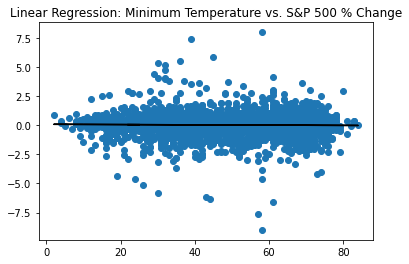

In [10]:
linear_regressor.fit(weather_min, stock_percent)  
Y_pred = linear_regressor.predict(weather_min) 
plt.scatter(weather_min, stock_percent)
plt.plot(weather_min, Y_pred, color='black')
plt.title("Linear Regression: Minimum Temperature vs. S&P 500 % Change")
plt.show()



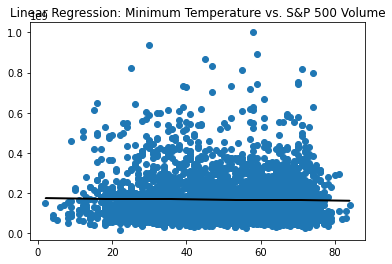

In [12]:
linear_regressor.fit(weather_min, stock_volume)  
Y_pred = linear_regressor.predict(weather_min) 
plt.scatter(weather_min, stock_volume)
plt.plot(weather_min, Y_pred, color='black')
plt.title("Linear Regression: Minimum Temperature vs. S&P 500 Volume")
plt.show()
